# Data Oriented Programming Paradigms - Exercise 3
<h3> Preprocessing "cwurData.csv" </h3>

In [4]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn import preprocessing

In [5]:
# Read CSV file-
cwur_data = pd.read_csv("cwurData.csv")

In [6]:
# Get shape/dimension of data-
cwur_data.shape

(2200, 14)

In [7]:
# Get information about dataset-
cwur_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
world_rank              2200 non-null int64
institution             2200 non-null object
country                 2200 non-null object
national_rank           2200 non-null int64
quality_of_education    2200 non-null int64
alumni_employment       2200 non-null int64
quality_of_faculty      2200 non-null int64
publications            2200 non-null int64
influence               2200 non-null int64
citations               2200 non-null int64
broad_impact            2000 non-null float64
patents                 2200 non-null int64
score                   2200 non-null float64
year                    2200 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 240.7+ KB


In [8]:
# Check for missing value(s)-
cwur_data.isnull().values.any()

True

In [9]:
# Get column/attribute names containing NAs-
cwur_data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [10]:
# Get number of unique values for 'institution' column-
len(cwur_data['institution'].unique().tolist())

1024

In [11]:
# Get number of unique values for 'country' column-
len(cwur_data['country'].unique().tolist())

59

In [12]:
# Do label encoding for the 2 columns. Transform Categories into Integers-
labelencoder = preprocessing.LabelEncoder()
labelencoder2 = preprocessing.LabelEncoder()

labelencoder.fit(cwur_data['institution'])
labelencoder2.fit(cwur_data['country'])

LabelEncoder()

In [13]:
# Transform categories into integers- apply fitted encoder to pandas column-
encoded_institution = labelencoder.transform(cwur_data['institution'])
encoded_country = labelencoder2.transform(cwur_data['country'])

In [14]:
# Add new columns to DataFrame-
cwur_data['encoded_institution'] = encoded_institution
cwur_data['encoded_country'] = encoded_country

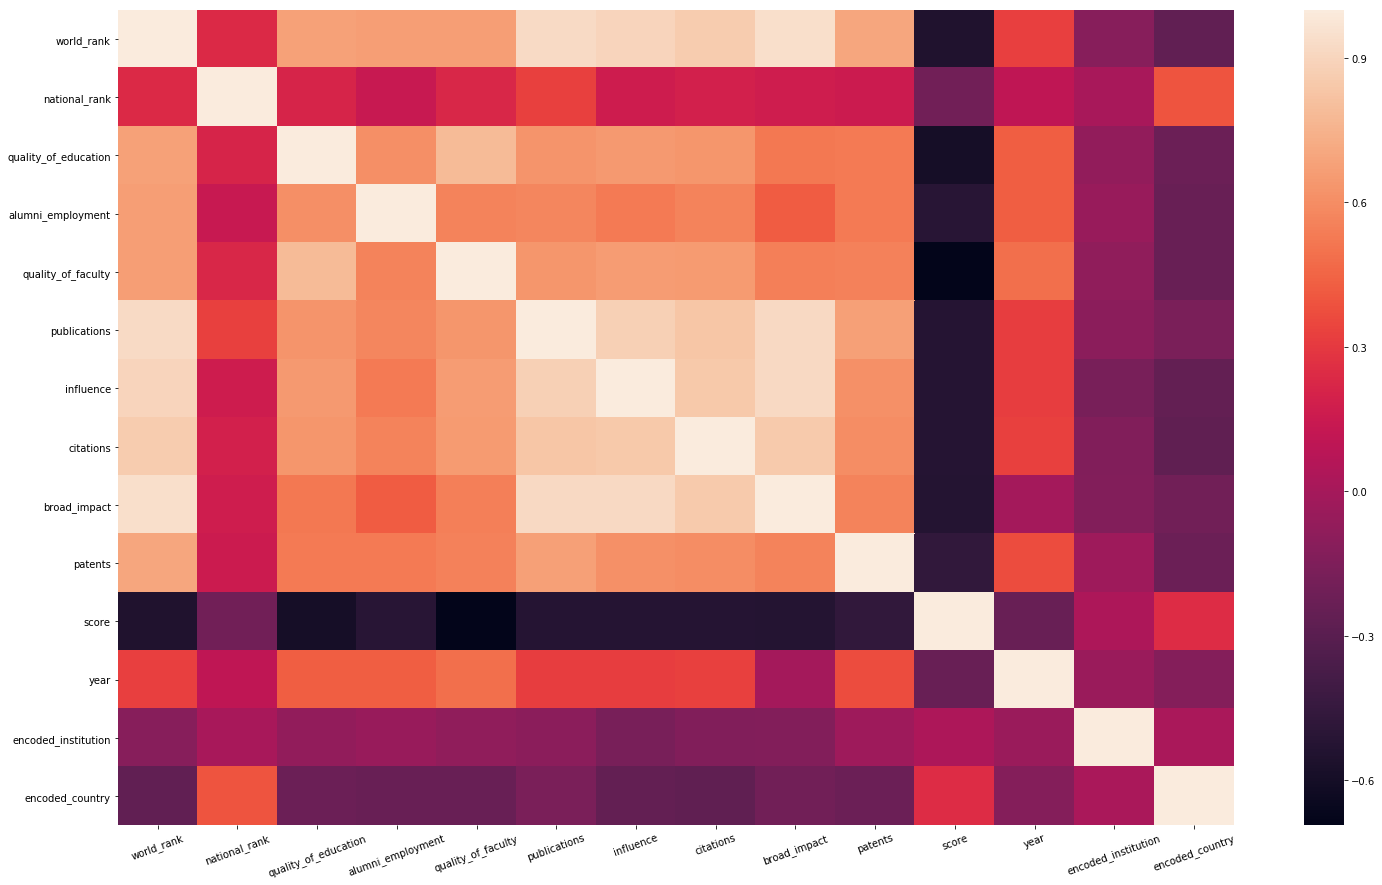

In [21]:
# Visualizations:

# Columns to use for visualization-
cols_to_use = []
cols_to_use = cwur_data.columns.tolist()

# Remove the following 2 columns from list-                            
cols_to_use.remove('country')
cols_to_use.remove('institution')

# Compute correlation for columns in 'cols_to_use'-
corr_mat = cwur_data.loc[:, cols_to_use].corr()

# Create a correlation graph-
sns.heatmap(corr_mat)
plt.xticks(rotation = 20)

plt.rcParams['figure.figsize'] = [25, 10]  # creates a figure with 25 (width) x 10 (height) inches

plt.show()

# We can use the correlation graph for further exploratory analysis!

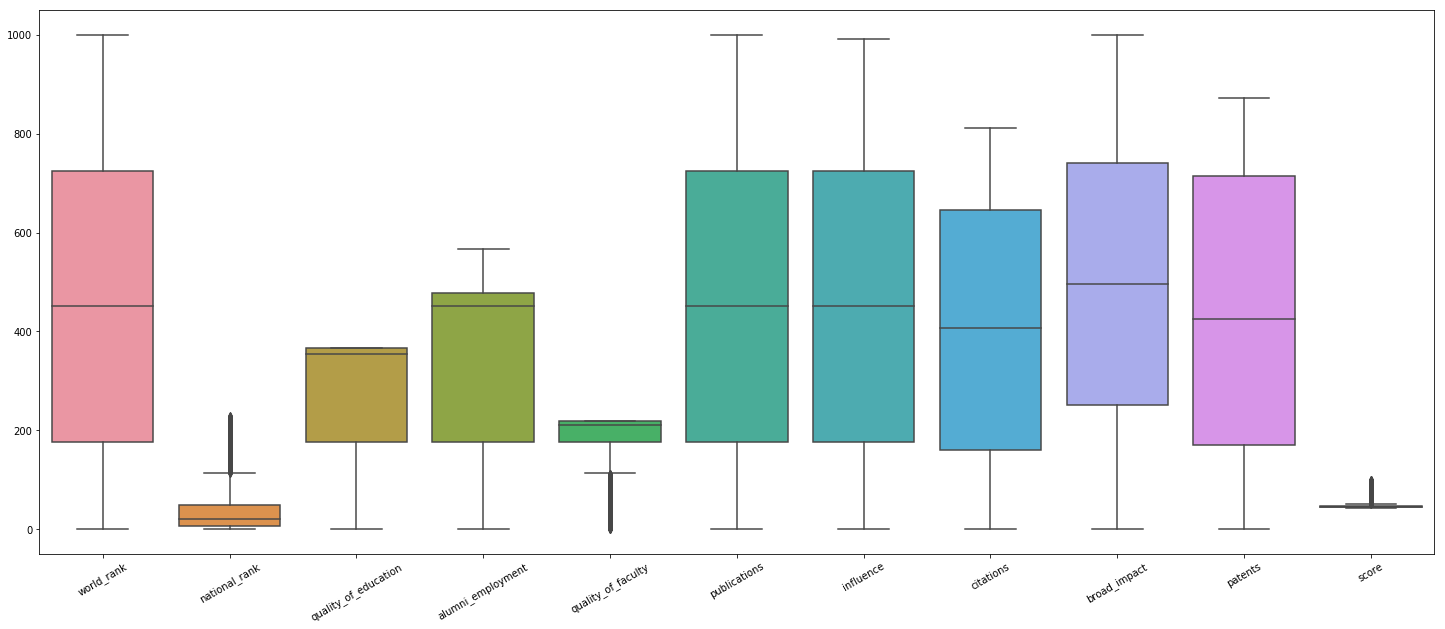

In [22]:
# Boxplots-

# Create a list variable to store all attribute/column names for which
# boxplots have to be drawn-
cols_boxplot = cols_to_use.copy()

# Remove the following columns/attributes-
cols_boxplot.remove('year')
cols_boxplot.remove('encoded_country')
cols_boxplot.remove('encoded_institution')



# This will make boxplots for each numeric column of your dataframe-
# sns.boxplot(data = cwur_data)
sns.boxplot(data = cwur_data.loc[:, cols_boxplot])

# Rotate text on x-axis by 30 degrees-
plt.xticks(rotation = 30)

plt.show()

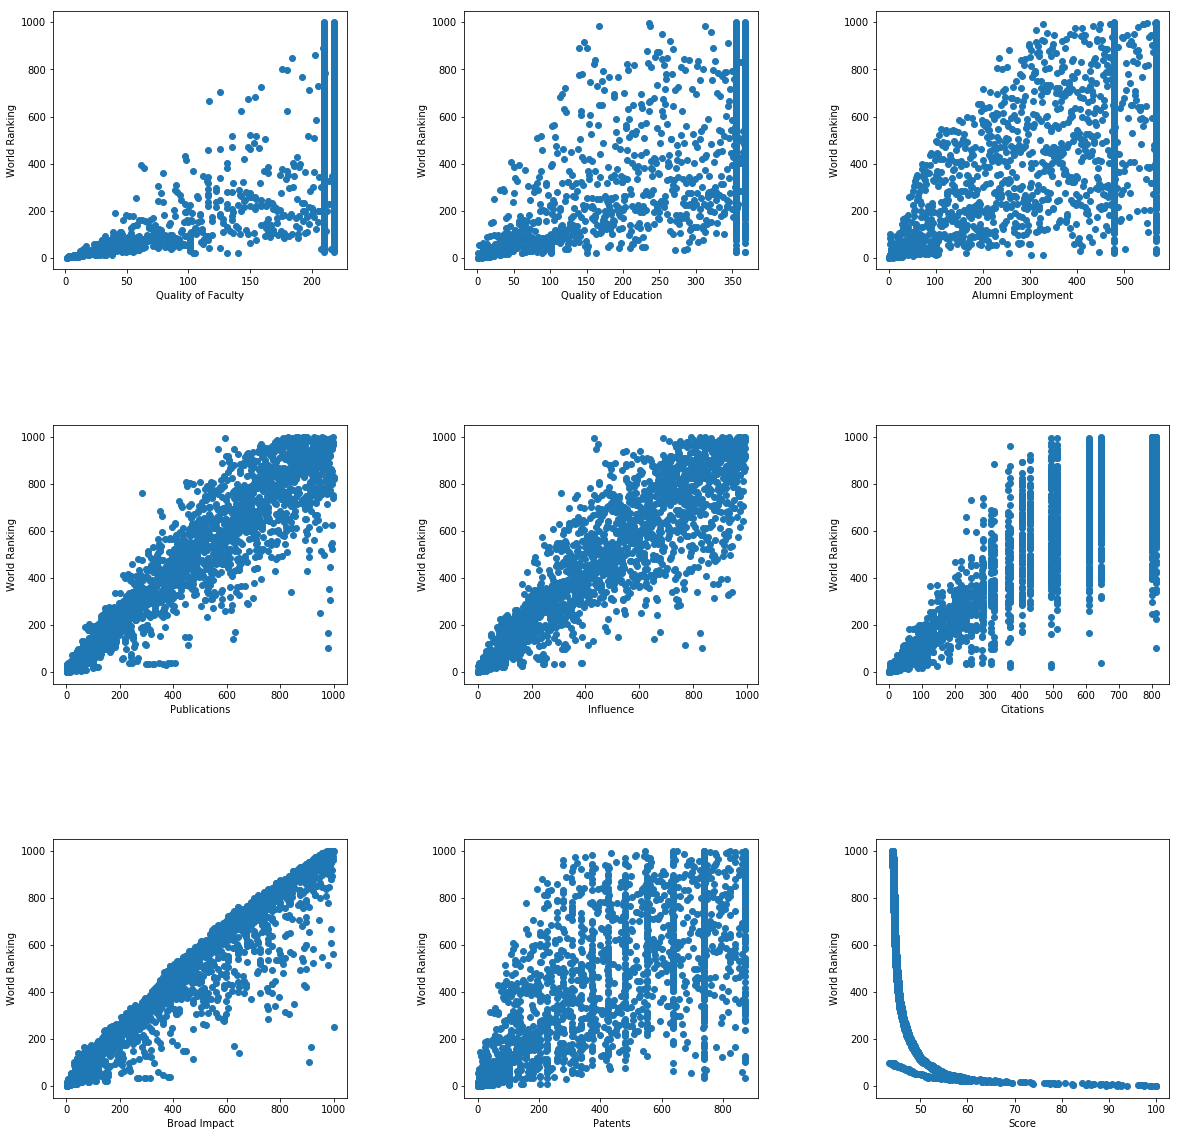

In [33]:
# Draw multiple plots together-
# Scatter plot of different attributes with 'world_rank' attribute to see correlation


fig, ax = plt.subplots(3, 3)

# Adjust spacing between plots-
fig.subplots_adjust(hspace = 0.6, wspace = 0.4)

ax[0, 0].scatter(cwur_data["quality_of_faculty"], cwur_data["world_rank"])
ax[0, 0].set_xlabel("Quality of Faculty")
ax[0, 0].set_ylabel("World Ranking")

ax[0, 1].scatter(cwur_data["quality_of_education"], cwur_data["world_rank"])
ax[0, 1].set_xlabel("Quality of Education")
ax[0, 1].set_ylabel("World Ranking")

ax[0, 2].scatter(cwur_data["alumni_employment"], cwur_data["world_rank"])
ax[0, 2].set_xlabel("Alumni Employment")
ax[0, 2].set_ylabel("World Ranking")

ax[1, 0].scatter(cwur_data["publications"], cwur_data["world_rank"])
ax[1, 0].set_xlabel("Publications")
ax[1, 0].set_ylabel("World Ranking")

ax[1, 1].scatter(cwur_data["influence"], cwur_data["world_rank"])
ax[1, 1].set_xlabel("Influence")
ax[1, 1].set_ylabel("World Ranking")

ax[1, 2].scatter(cwur_data["citations"], cwur_data["world_rank"])
ax[1, 2].set_xlabel("Citations")
ax[1, 2].set_ylabel("World Ranking")

ax[2, 0].scatter(cwur_data["broad_impact"], cwur_data["world_rank"])
ax[2, 0].set_xlabel("Broad Impact")
ax[2, 0].set_ylabel("World Ranking")

ax[2, 1].scatter(cwur_data["patents"], cwur_data["world_rank"])
ax[2, 1].set_xlabel("Patents")
ax[2, 1].set_ylabel("World Ranking")

ax[2, 2].scatter(cwur_data["score"], cwur_data["world_rank"])
ax[2, 2].set_xlabel("Score")
ax[2, 2].set_ylabel("World Ranking")

plt.show()
